## Interpolating real data

##### Go through the [Interpolation Guide](https://github.com/tww-carleton/geodac-2022/blob/main/notebooks/InterpolationGuide.ipynb) before this challenge!

A common problem when working with satellite data is that the resolution of the data product may not match with other data or models to which you want to compare. Interpolation, or re-gridding, takes data specified on a particular set of geospatial coordinates and converts it onto another. This is common, but we want the process to be as error-free as possible. 

In [1]:
#importing libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/envs/GEODACenv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# You can use your own data files 

ds  = xr.load_dataset('air.sig995.1948.nc').isel(time=0)
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 1948-01-01
Data variables:
    air      (lat, lon) float32 237.1 237.1 237.1 237.1 ... 255.2 255.2 255.2
Attributes:
    Conventions:    COARDS
    title:          4x daily NMC reanalysis (1948)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    history:        created 99/05/11 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

Here, we are showing an alternative way to deal with some NetCDF files: xarray. An xarray dataset already behaves much like a pandas dataframe, and can also easily be plotted.

[ 90.          89.51236264  89.02472527  88.53708791  88.04945055
  87.56181319  87.07417582  86.58653846  86.0989011   85.61126374
  85.12362637  84.63598901  84.14835165  83.66071429  83.17307692
  82.68543956  82.1978022   81.71016484  81.22252747  80.73489011
  80.24725275  79.75961538  79.27197802  78.78434066  78.2967033
  77.80906593  77.32142857  76.83379121  76.34615385  75.85851648
  75.37087912  74.88324176  74.3956044   73.90796703  73.42032967
  72.93269231  72.44505495  71.95741758  71.46978022  70.98214286
  70.49450549  70.00686813  69.51923077  69.03159341  68.54395604
  68.05631868  67.56868132  67.08104396  66.59340659  66.10576923
  65.61813187  65.13049451  64.64285714  64.15521978  63.66758242
  63.17994505  62.69230769  62.20467033  61.71703297  61.2293956
  60.74175824  60.25412088  59.76648352  59.27884615  58.79120879
  58.30357143  57.81593407  57.3282967   56.84065934  56.35302198
  55.86538462  55.37774725  54.89010989  54.40247253  53.91483516
  53.4271978

/opt/anaconda3/envs/GEODACenv/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/opt/anaconda3/envs/GEODACenv/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/opt/anaconda3/envs/GEODACenv/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/opt/anaconda3/envs/GEODACenv/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Inde

Text(0.5, 1.0, 'Interpolated data')

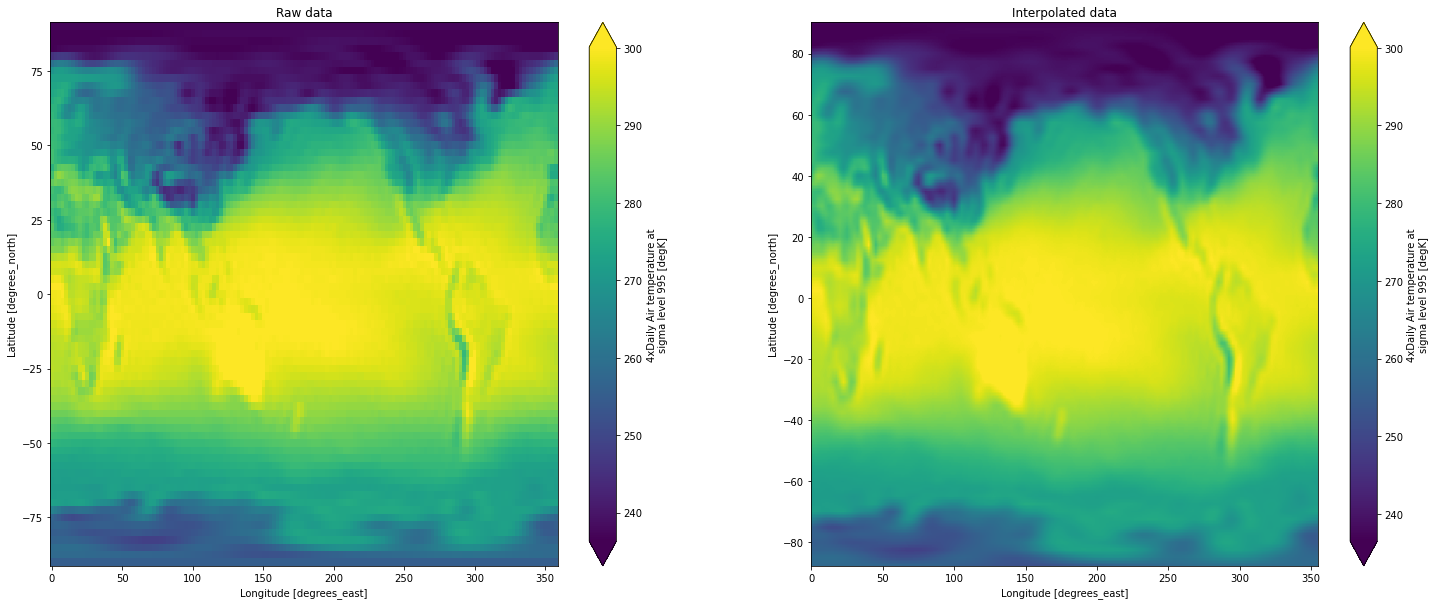

In [3]:
# Raw data

fig, axes = plt.subplots(ncols=2,figsize=(25, 10))

ds.air.plot(ax=axes[0],robust=True)

axes[0].set_title("Raw data")

# This defines a new longitude and latitude grid, at higher resolution than the original
new_lon = np.linspace(ds.lon[0], ds.lon[-2], ds.dims["lon"] * 5)
new_lat = np.linspace(ds.lat[0], ds.lat[-2], ds.dims["lat"] * 5)

print (new_lat)

# The interp() command interpolates the data onto the new grid
dsi = ds.interp(lat=new_lat, lon=new_lon)

dsi.air.plot(ax=axes[1],robust=True)

axes[1].set_title("Interpolated data")

It can be observed that using spatial interpolation we have reduced the grid size and estimated the air temperature values at finer resolution.

<div class="alert alert-block alert-warning">
    <b>WARNING!</b> This does not mean that we are creating new information. Even though the array might have more elements, the amount of information contained in the original data has been averaged over those new elements. The interp() command assumes that the field between adjacent points is smooth and creates an estimate based on surrounding values.
</div>

Usually if we are comparing two datasets, we would resample the higher resolution product down to the coarser grid.

Consider the following example:

/opt/anaconda3/envs/GEODACenv/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/opt/anaconda3/envs/GEODACenv/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/opt/anaconda3/envs/GEODACenv/lib/python3.9/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/opt/anaconda3/envs/GEODACenv/lib/python3.9/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Inde

Text(0.5, 1.0, 'Remapped data')

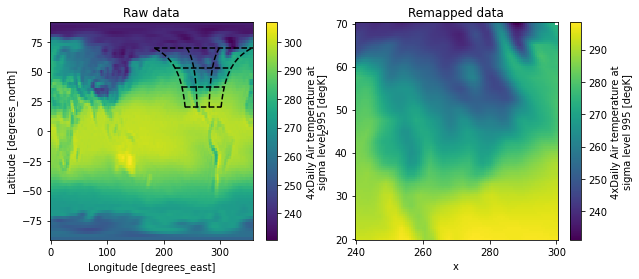

In [4]:
# Old coordinate system

x = np.linspace(240, 300, 100)

z = np.linspace(20, 70, 100)

# Relation between new (lat, lon) and original (x, z) coordinates
lat = xr.DataArray(z, dims=["z"], coords={"z": z})

lon = xr.DataArray(
    (x[:, np.newaxis] - 270) / np.cos(z * np.pi / 180) + 270,
    dims=["x", "z"],
    coords={"x": x, "z": z},
)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

ds.air.plot(ax=axes[0])


# draw the new coordinate on the original coordinates.
for idx in [0, 33, 66, 99]:
    axes[0].plot(lon.isel(x=idx), lat, "--k")


for idx in [0, 33, 66, 99]:
    axes[0].plot(*xr.broadcast(lon.isel(z=idx), lat.isel(z=idx)), "--k")


axes[0].set_title("Raw data")

dsi = ds.interp(lon=lon, lat=lat)

dsi.air.plot(ax=axes[1])

axes[1].set_title("Remapped data")

### Saving your work 

#### Saving Datasets and DataArrays to NetCDF

Saving your Datasets and DataArrays objects to NetCDF files couldn’t be simpler. The xarray module that we’ve been using to load NetCDF files provides methods for saving your Datasets and DataArrays as NetCDF files.

Here is the manual page on the subjet: http://xarray.pydata.org/en/stable/generated/xarray.Dataset.to_netcdf.html

The method ._to_netcdf( ) is available to both Datasets and DataArrays objects. 

#### Syntax

*your_dataset.to_netcdf('/your_filepath/your_netcdf_filename.nc')*

In [ ]:
dsi.to_netcdf(path='C:\\(add your path)\challenge3_output.nc')
print ('finished saving')

## Try it yourself!

#### 1. Use the data files we used in the last two tasks. Read in the latitude and longitude for each data file, and the nitrogendioxide_tropospheric_column from the TROPOMI file.

    Use interp to put the nitrogendioxide_tropospheric_column TROPOMI data onto the grid from the VIIRS file. Create maps showing the data before and after the interpolation. Save the result to a single NetCDF file, along with both coordinate grids.
    
#### 2. This interp() function is great... if its assumptions are met. What if the pixels in one of your grids aren't all the same size? Or, what if the uncertainty on some of the measurements is much greater than others? You may want to do a weighted average of some kind.

    Have a close look at the boundaries of the TROPOMI data (look at /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds and longitude_bounds). Are all the TROPOMI pixels the same size? How might you construct a weighted average so that equal areas get equal weight in the re-gridded product?


In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc4
from netCDF4 import Dataset

# Get the latitude/longitude grid from VIIRS
viirs = h5py.File('VNP46A2.A2022265.h10v04.001.2022273135614.h5', "r")
baseattrkey = list(viirs.attrs.keys())
baseattrval = list(viirs.attrs.values())

g3=viirs.get('/HDFEOS/GRIDS/VNP_Grid_DNB/Data Fields')
datavalues3 = np.array(g3.get('Gap_Filled_DNB_BRDF-Corrected_NTL'))

lat1 = np.float32(baseattrval[13])
lat2 = np.float32(baseattrval[30])
latrange = lat1 - lat2
latstep = latrange / datavalues3.shape[0]
vlat = np.arange(lat2,lat1,latstep)

lon1 = np.float32(baseattrval[3])
lon2 = np.float32(baseattrval[35])
lonrange = lon1 - lon2
lonstep = lonrange / datavalues3.shape[0]
vlon = np.arange(lon2,lon1,lonstep)

# Get the latitude/longitude grid and NO2 data from TROPOMI
my_example_nc_file = 'S5P_OFFL_L2__NO2____20220116T180124_20220116T194254_22081_02_020301_20220118T102523.nc'
tropomi = Dataset(my_example_nc_file, mode='r')
tlon = tropomi.groups['PRODUCT'].variables['longitude'][0,:,:]
tlat = tropomi.groups['PRODUCT'].variables['latitude'][0,:,:]
tno2 = tropomi.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'][0,:,:]

# construct an xarray DataArray from the TROPOMI data
tarray = xr.DataArray(
           data = tno2,
           dims = ["alongtrack","crosstrack"],
           coords = dict(
             lon=(["alongtrack","crosstrack"], tlon),
             lat=(["alongtrack","crosstrack"], tlat))
         )

# construct an xarray DataArray from the VIIRS data
varray = xr.DataArray(
           data = datavalues3,
           dims = ["lat","lon"],
           coords = dict(
             lat=(["lat"],vlat),
             lon=(["lon"],vlon))
         )

tarray.sel(alongtrack=[50])


/opt/anaconda3/envs/GEODACenv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<xarray.DataArray (alongtrack: 1, crosstrack: 450)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)
Coordinates:
    lon      (alongtrack, crosstrack) float32 116.7 116.5 116.4 ... 73.45 73.35
    lat      (alongtrack, crosstrack) float32 -59.65 -59.67 ... -52.39 -52.33
Dimensions without coordinates: alongtrack, crosstrack